In [43]:
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
#import pandas and numpy libraries
import pandas as pd
import numpy as np
## Libraries to establish assosiation rule
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
## Visualiztion Library Imports
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
books = pd.read_csv("book.csv")

In [4]:
books.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [5]:
books.shape

(2000, 11)

In [6]:
books.dtypes

ChildBks     int64
YouthBks     int64
CookBks      int64
DoItYBks     int64
RefBks       int64
ArtBks       int64
GeogBks      int64
ItalCook     int64
ItalAtlas    int64
ItalArt      int64
Florence     int64
dtype: object

In [7]:
book_types = list(books.columns)
book_types

['ChildBks',
 'YouthBks',
 'CookBks',
 'DoItYBks',
 'RefBks',
 'ArtBks',
 'GeogBks',
 'ItalCook',
 'ItalAtlas',
 'ItalArt',
 'Florence']

## Changing the data type into bool type

In [8]:
data = books.iloc[:].astype('bool')
data.head(3)

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,False,True,False,True,False,False,True,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False


In [9]:
data.columns

Index(['ChildBks', 'YouthBks', 'CookBks', 'DoItYBks', 'RefBks', 'ArtBks',
       'GeogBks', 'ItalCook', 'ItalAtlas', 'ItalArt', 'Florence'],
      dtype='object')

In [10]:
data.dtypes

ChildBks     bool
YouthBks     bool
CookBks      bool
DoItYBks     bool
RefBks       bool
ArtBks       bool
GeogBks      bool
ItalCook     bool
ItalAtlas    bool
ItalArt      bool
Florence     bool
dtype: object

# Data Mining to Identify rules

## Frequently Bought Item list :- 
+ We have records of a total = 2000 tranctions.
+ 1. For our evaluation we shall consider items corrosponding to every 500th Purchases.
+ Hence the support value for Data Mining shall be 0.25

In [11]:
freq_25 = apriori(data,min_support=0.25,use_colnames=True) # Items corrosponding to minimum 500 Purchases

+ Item sets for min_support = 0.25

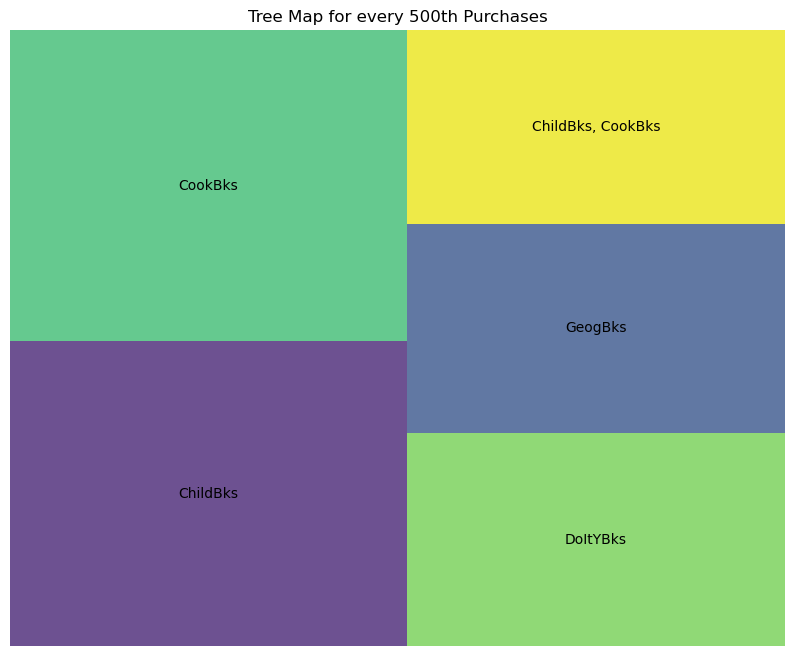

In [44]:
import squarify
plt.figure(figsize=(10,8))
squarify.plot(sizes =freq_25['support'],label=freq_25['itemsets'].apply(lambda x: ', '.join(list(x))),alpha=0.8)
plt.title('Tree Map for every 500th Purchases')
plt.axis('off')
plt.show()

## For support = 0.25 and confidence = 0.6

In [13]:
rules_25 = association_rules(freq_25,min_threshold=0.6)
rules_25

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.44124,0.498856


### Venn-Diagram for the Assosiation Rule Found :- 

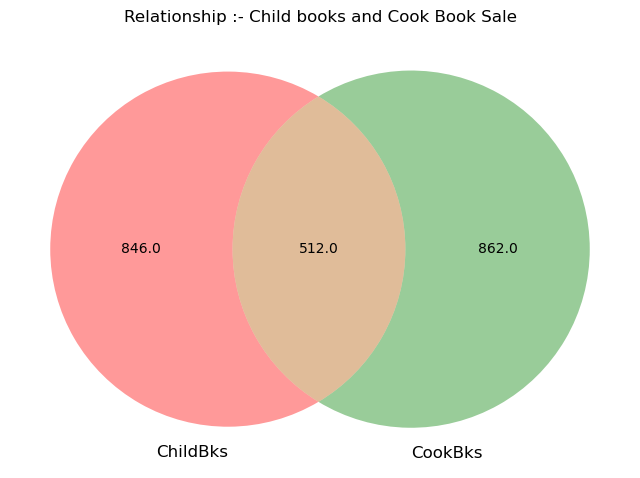

In [14]:
from matplotlib_venn import venn2
plt.figure(figsize=(8, 6))
supports = [2000*.423,2000*0.431,2000*0.256] ## Total number of books bought = 2000*support (for each case)
labels = ['ChildBks','CookBks']
venn2(subsets=supports,set_labels=labels)
plt.title('Relationship :- Child books and Cook Book Sale')
plt.show()

## The Rule that can be concluded from the above analysis considering the magnitude of 
##### Minimum Support = 0.25, Maximum confidence = 0.6 and lift = 1.404179 is :- 
+ The Sales of Child Books imply the high likelyhood of sale of Cook Books

## 2. We evaluate every 400th Transaction

In [15]:
freq_20 = apriori(df = data, min_support=0.2,use_colnames=True)

In [16]:
freq_20

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.2560,"(ChildBks, CookBks)"


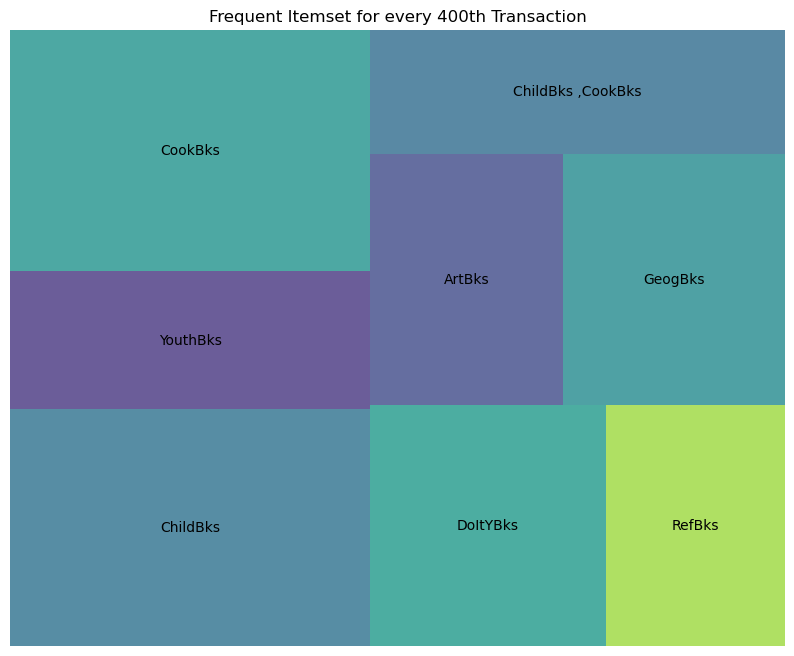

In [45]:
plt.figure(figsize=(10,8))
squarify.plot(sizes =freq_20['support'],label=freq_20['itemsets'].apply(lambda x:" ,".join(list(x))),alpha = 0.8)
plt.title("Frequent Itemset for every 400th Transaction")
plt.axis('off')
plt.show()

In [18]:
rule_20 = association_rules(freq_20,min_threshold=0.6)
rule_20

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.44124,0.498856


## It's clear that no new rule will be found here. Hence leaving this analysis

## 3. we explore every 300th Transactions i.e. the min_support = 0.15

In [19]:
freq_15 = apriori(data, min_support= 0.15, use_colnames=True)

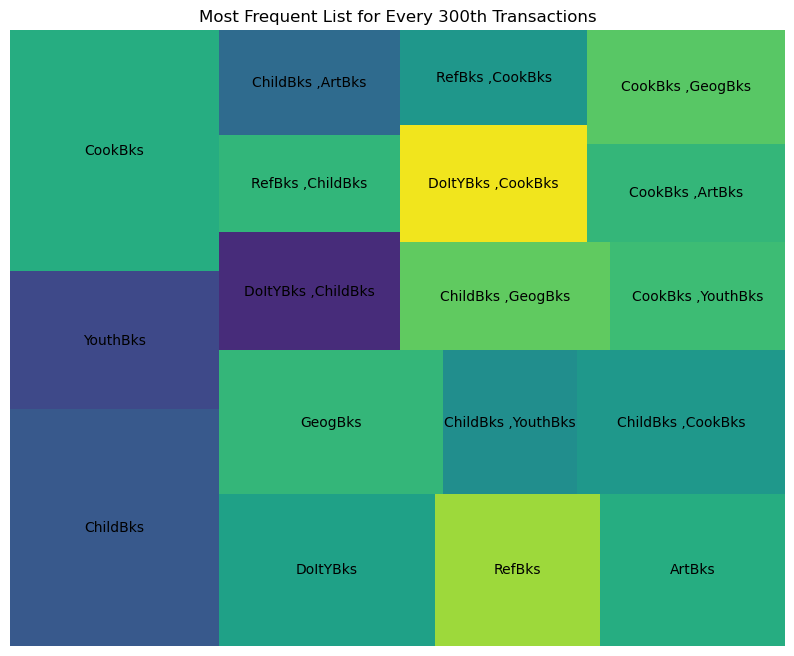

In [46]:
plt.figure(figsize=(10,8))
squarify.plot(freq_15['support'], label = freq_15['itemsets'].apply(lambda x: " ,".join(list(x))))
plt.title("Most Frequent List for Every 300th Transactions")
plt.axis("off")
plt.show()

## From the Treemap we can see that there are 11 possible assosiation rules for this support value. So in order to select the most relevent assosiation rule :- 

+ Confidence = 0.7 and lift > 1.65

In [21]:
rule_15 = association_rules(freq_15,metric='lift',min_threshold=1.65)

In [22]:
rule_15 = rule_15[rule_15['confidence']>=0.7]

In [23]:
rule_15

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548,0.510629
3,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074,0.554271


### 1. Venn Diagram for the 'RefBks' and 'ChildBks'

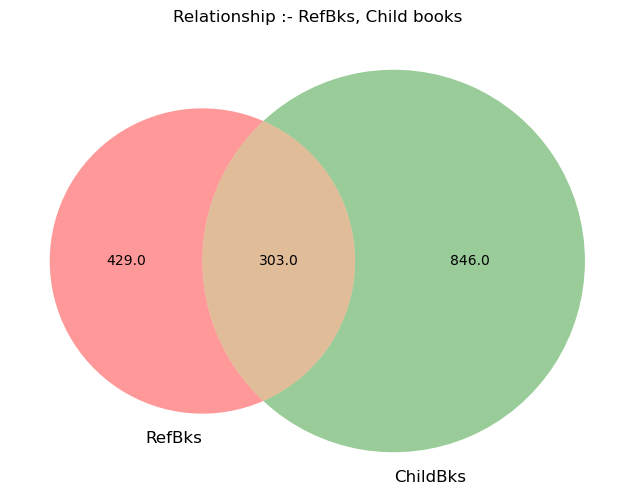

In [24]:
plt.figure(figsize=(8, 6))
supports = [2000*0.2145,2000*0.423,2000*0.1515] ## Total number of books bought = 2000*support
labels = ['RefBks','ChildBks']
venn2(subsets=supports,set_labels=labels)
plt.title('Relationship :- RefBks, Child books')
plt.show()

### 2. Venn Diagram for the 'GeogBks' and 'ChildBks'

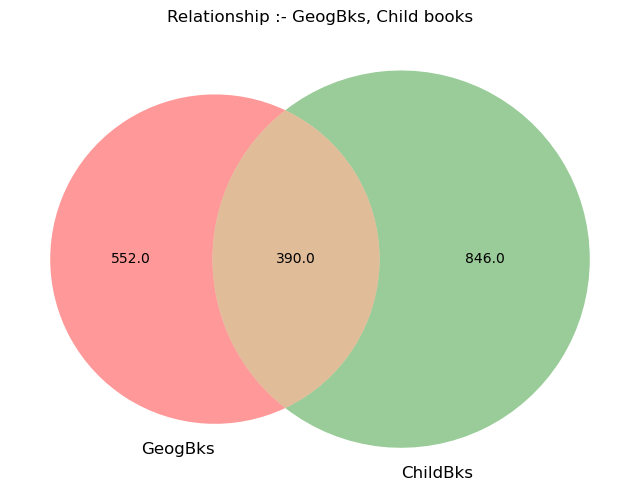

In [25]:
plt.figure(figsize=(8, 6))
supports = [2000*0.2760,2000*0.423,2000*0.1950] ## Total number of books bought = 2000*support
labels = ['GeogBks','ChildBks']
venn2(subsets=supports,set_labels=labels)
plt.title('Relationship :- GeogBks, Child books')
plt.show()

## 4. We explore every 200th Transactions :- i.e. min_support = 0.10
+ We already have 3 rules for one antecedent now we explore rules with atleast two antecedents

In [26]:
freq_10 = apriori(data,min_support = 0.10, use_colnames=True)

## Selection of relevent association rules

In [27]:
rule_10 = association_rules(df = freq_10,metric='lift',min_threshold = 1.2)
rule_10['antecedents_length'] = rule_10['antecedents'].apply(lambda x:len(x))
rule_10

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedents_length
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,0.633449,1
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714,1
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856,1
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870,1
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842,1
...,...,...,...,...,...,...,...,...,...,...,...
95,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657,0.683298,2
96,"(ArtBks, GeogBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812,0.537602,2
97,(CookBks),"(ArtBks, GeogBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237,0.824355,1
98,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327,0.726961,1


In [33]:
rule_10 = rule_10[ (rule_10['antecedents_length'] >= 2) &
       (rule_10['confidence'] > 0.81) &
       (rule_10['lift'] > 1.65) ]
rule_10

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedents_length
83,"(DoItYBks, ArtBks)",(CookBks),0.1235,0.431,0.1015,0.821862,1.906873,0.048272,3.194159,0.542591,2
89,"(DoItYBks, GeogBks)",(CookBks),0.1325,0.431,0.1085,0.818868,1.899926,0.051392,3.141354,0.546010,2
96,"(ArtBks, GeogBks)",(CookBks),0.1275,0.431,0.1035,0.811765,1.883445,0.048547,3.022812,0.537602,2


### Since the 'antecedent support' is much less as compare to the 'consequent support' we only select the rule with maximum lift

In [34]:
rule_10 = rule_10[ (rule_10['antecedents_length'] >= 2) &
       (rule_10['confidence'] > 0.81) &
       (rule_10['lift'] > 1.9) ]
rule_10

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedents_length
83,"(DoItYBks, ArtBks)",(CookBks),0.1235,0.431,0.1015,0.821862,1.906873,0.048272,3.194159,0.542591,2


### We can see that eventhough the 'antecedent support' is not too high. A very high value of 'confidence' and  'lift' value indicate that the mentioned assosiation relationship worths the consideration

## Conclusion :- 
+ The Rules obtained from above data mining are :-

In [40]:
rules_25

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.44124,0.498856


## This rule is selected because :-
+ Out of Total 846 purchaces of 'Childbks' 512 Purchases also included Purchase of 'CookBks' 

In [41]:
rule_15

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548,0.510629
3,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074,0.554271


## This rule is selected because :-
+ Out of Total 429 purchaces of 'RefBks' 303 Purchases were included Purchase of 'ChildBks' and 
+ Out of Total 552 purchaces of 'GeogBks' 390 Purchases were included Purchase of 'ChildBks'

In [42]:
rule_10

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedents_length
83,"(DoItYBks, ArtBks)",(CookBks),0.1235,0.431,0.1015,0.821862,1.906873,0.048272,3.194159,0.542591,2


## This rule is selected because :-
+ Out of Total 247 purchaces of 'DoItYBks and ArtBks' 203 Purchases also included Purchase of 'CookBks' 